In [1]:
%matplotlib inline

# Vehicle registration in Belgium (2014)

Data downloaded from http://mobilit.belgium.be/nl/publicaties/open_data/,
just some data-visualisation and screening of the dataset.

*Stijn Van Hoey, 2015*

In [2]:
import pandas as pad
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
registered = pd.read_excel("Registration transactions 2014_tcm466-262543.xlsx", header=2)

In [4]:
registered.head()

,Transaction Timest Year,Transaction Timest Month Code,New/Used Vehicle,Region Gewest,Province_label,Titular Type,Vehicle grouping by Design,Vehicle grouping by use,Exact Value Maxmass Cat,Fk M Vehicle Buildupcode Current Situation,Buildup Label current situation,Vehicle Euro Norm Code,CO2 Category,Vehicle Fuel Code,Vehicle Fuel Label,# Transactions
0,2014,1,New Vehicle,BRU,Brussel,M,L,HEAVY 2-3-4 W,1-1000,NaN,NaN,2,99,01,BENZINE,3
1,2014,1,New Vehicle,BRU,Brussel,M,L,HEAVY 2-3-4 W,1-1000,NaN,NaN,3,99,01,BENZINE,23
2,2014,1,New Vehicle,BRU,Brussel,M,L,HEAVY 2-3-4 W,Unknown,NaN,NaN,3,99,01,BENZINE,1
3,2014,1,New Vehicle,BRU,Brussel,M,M1,CAR,1501-3000,NaN,NaN,5,99,01,BENZINE,1
4,2014,1,New Vehicle,BRU,Brussel,M,M1,CAR,1501-3000,NaN,NaN,5b,99,07,BENZINE + ELEKTR.,1


## Rechtspersoon (M) of Natuurlijke persoon (P)

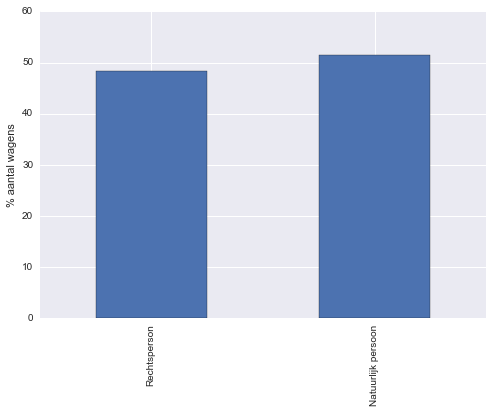

In [132]:
(100*registered.groupby('Titular Type')['Titular Type'].count()/(len(registered))).plot(kind='bar')
plt.ylabel('% aantal wagens')
plt.xlabel(' ')
plt.gca().set_xticklabels(['Rechtsperson', 'Natuurlijk persoon'])

### Enkel voor Vlaanderen

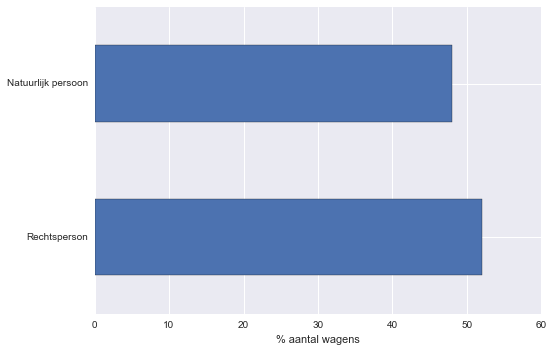

In [40]:
VL_registered = registered[registered['Region Gewest'] == 'VLA']
(100*VL_registered.groupby('Titular Type')['Titular Type'].count()/(len(VL_registered))).plot(kind='barh', )
plt.xlabel('% aantal wagens')
plt.ylabel(' ')
plt.gca().set_yticklabels(['Rechtsperson', 'Natuurlijk persoon'])

In [61]:
titular_gewest = registered.groupby('Region Gewest')['Titular Type'].value_counts(normalize=True).unstack().drop('N A')

In [128]:
titular_gewest

,M,P
Region Gewest,,
BRU,0.582969,0.417031
VLA,0.519986,0.480014
WAL,0.439105,0.560895


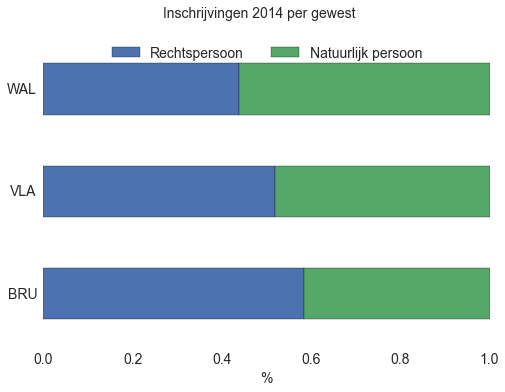

In [131]:
fig, ax  = plt.subplots()
titular_gewest.plot(ax=ax, kind='barh', stacked=True, legend=False, 
                    fontsize=14)
ax.set_yticks([0,1,2])
ax.legend(['Rechtspersoon', 'Natuurlijk persoon'], loc='center', 
          bbox_to_anchor=(0.5, 0.95), fontsize=14, ncol=2)
ax.set_xlabel('%', fontsize=14)
ax.set_ylabel(' ')
ax.set_axis_bgcolor('white')
fig.suptitle('Inschrijvingen 2014 per gewest', size=14)
plt.savefig('inschrijvingen_2014_titularis.png', dpi=150)

## Number of registrations per province

In [5]:
registered.columns

Index([u'Transaction Timest Year', u'Transaction Timest Month Code', u'New/Used Vehicle', u'Region Gewest', u'Province_label', u'Titular Type', u'Vehicle grouping by Design', u'Vehicle grouping by use', u'Exact Value Maxmass Cat', u'Fk M Vehicle Buildupcode Current Situation', u'Buildup Label current situation', u'Vehicle Euro Norm Code', u'CO2 Category', u'Vehicle Fuel Code', u'Vehicle Fuel Label', u'# Transactions'], dtype='object')

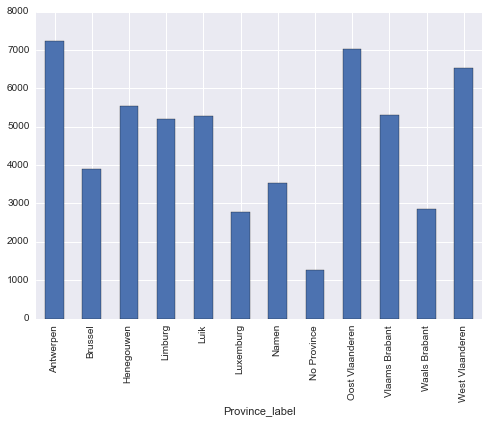

In [6]:
registered.groupby('Province_label')['Province_label'].count().plot(kind='bar')

### Splitting new and second hand vehicles

In [376]:
new_vehicle = registered[registered['New/Used Vehicle'] == 'New Vehicle']
old_vehicle = registered[registered['New/Used Vehicle'] == 'Used Vehicle']

In [377]:
old_vehicle['Vehicle grouping by use'].value_counts().sort_index()

AGRI-VEHICLE           3494
BUS                     739
CAMION                 6752
CAMPER                 2203
CAR                    5588
CARAVAN                 815
HEAVY 2-3-4 W          2066
LIGHT 2-3-4 W           986
NOT CLASSIFIED YET      156
ROAD TRACTOR           1242
S-TRAILER              1896
SPECIAL USE            1674
TRAILER                4460
VAN                   12085
dtype: int64

In [378]:
new_vehicle['Vehicle grouping by use'].value_counts().sort_index()

AGRI-VEHICLE     2185
BUS               417
CAMION           2280
CAMPER            635
CAR                89
CARAVAN           280
HEAVY 2-3-4 W     638
LIGHT 2-3-4 W     369
ROAD TRACTOR      332
S-TRAILER        1245
SPECIAL USE       744
TRAILER          3001
VAN                46
dtype: int64

In [381]:
temp = pd.concat((old_vehicle['Vehicle grouping by use'].value_counts(), 
                  new_vehicle['Vehicle grouping by use'].value_counts()),
                keys=['old', 'new'], axis=1)

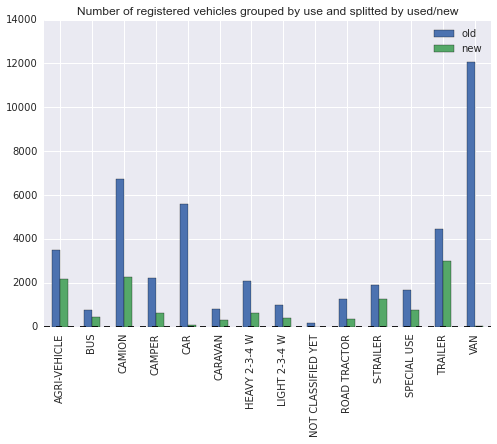

In [382]:
temp.plot(kind='bar')
plt.title('Number of registered vehicles grouped by use and splitted by used/new')

Without being an expert on the car business, some interesting observations:

* A lot, really a lot, of second-hand vans are registered?
* Almost no new cars are registered (where are newly produced cars going to?)
* Probably the HEAVY and LIGHT 2-3-4 W are the famous SUV-cars?
* Unless the decreasing amount of farms in Belgium, more agricultural vehicles and tractors are registered than cars?

Anyone can help/clarify on this?

Let's explore some other aspects visually:

Amount of new and old vehicles for each region:

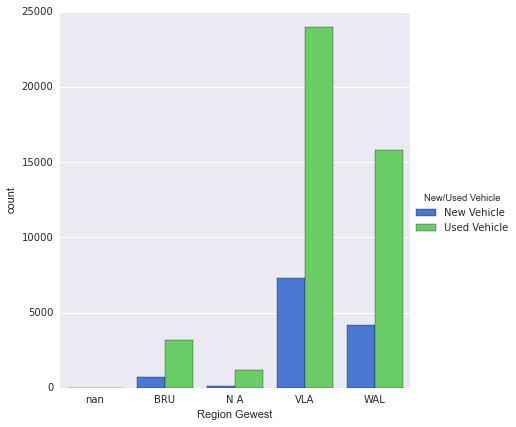

In [357]:
g = sns.factorplot("Region Gewest", hue="New/Used Vehicle",
                    data=registered, kind="bar",
                    size=6, palette="muted")

Amount of new and old vehicle for each province:

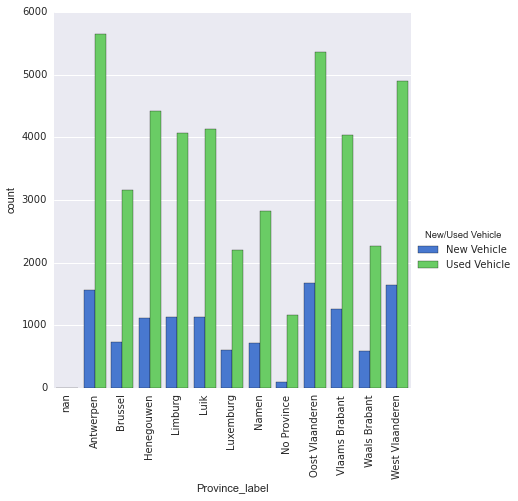

In [358]:
g = sns.factorplot("Province_label", hue="New/Used Vehicle",
                    data=registered, kind="bar",
                    size=6, palette="muted")
xt = plt.xticks(rotation=90) 

Amount of new and old vehicle for each month:

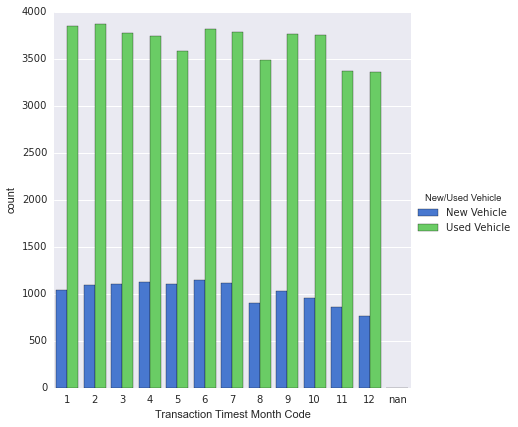

In [370]:
g = sns.factorplot("Transaction Timest Month Code", hue="New/Used Vehicle",
                    data=registered, kind="bar",
                    size=6, palette="muted")
g.set_xticklabels(range(1, 13) + ['nan'])

For all new vehicles, check the usage

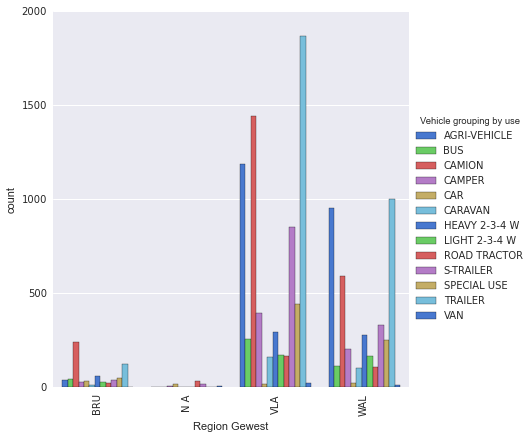

In [385]:
g = sns.factorplot('Region Gewest', hue='Vehicle grouping by use',
                    data=new_vehicle, kind="bar",
                    size=6, palette="muted")
xt = plt.xticks(rotation=90) 

## CO$_2$ characteristics

In [273]:
registered['CO2 Category'].unique()

array([ 99.,  nan])

Dus alle registraties hebben een categorie 99.?!?

## Fuel characteristics

In [386]:
registered.groupby(['Vehicle Fuel Code','Vehicle Fuel Label']).size()

Vehicle Fuel Code  Vehicle Fuel Label 
01                 BENZINE                 9092
02                 GASOLIE                32096
03                 LPG + BENZINE           2145
04                 ELEKTRICITEIT              3
05                 ANDEREN                   73
06                 AARDGAS (CNG)             22
07                 BENZINE + ELEKTR.         45
08                 GASOLIE + ELEKTR.          2
09                 WATERSTOF                  1
10                 MENGSMERING                1
11                 GASOLIE + LPG              4
12                 ELEKTRICITEIT + LPG        2
13                 BIO-ETHANOL                2
15                 BENZINE + CNG              4
dtype: int64

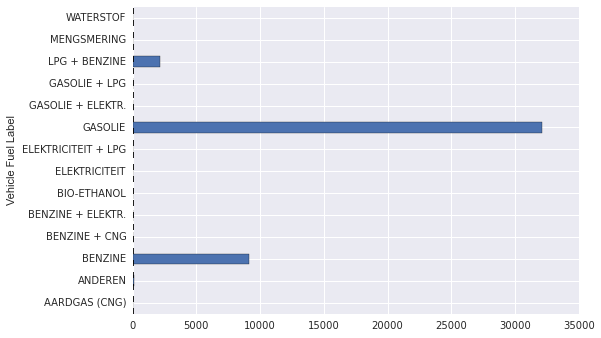

In [275]:
registered.groupby('Vehicle Fuel Label')['Vehicle Fuel Label'].count().plot(kind='barh')

Let's zoom in to see also the less-popular options:

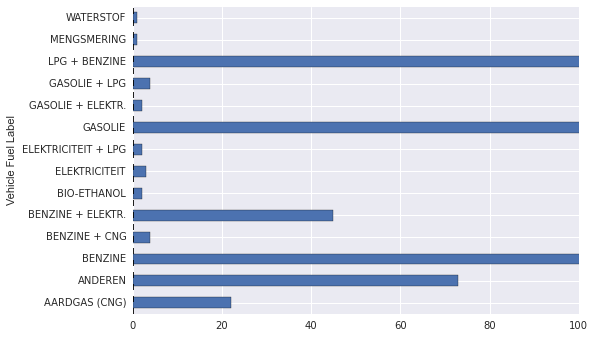

In [276]:
fig, ax = plt.subplots()
registered.groupby('Vehicle Fuel Label')['Vehicle Fuel Label'].count().plot(ax=ax, kind='barh')
ax.set_xlim([0, 100]);

### How popular are electric cars?

Let's take together all the cars with elektricity to make the comparison easier. First, an overview of the fule characteristics for each type of vehicle:

In [387]:
registered.groupby(['Vehicle grouping by use'])['Vehicle Fuel Label'].value_counts()

Vehicle grouping by use                     
AGRI-VEHICLE             GASOLIE                5053
                         BENZINE                 439
                         ANDEREN                  52
                         LPG + BENZINE             6
                         BIO-ETHANOL               1
BUS                      GASOLIE                1154
                         BENZINE                   2
CAMION                   GASOLIE                8911
                         BENZINE                  85
                         LPG + BENZINE            26
                         AARDGAS (CNG)             6
                         GASOLIE + ELEKTR.         2
                         ANDEREN                   1
                         BENZINE + CNG             1
CAMPER                   GASOLIE                2476
                         BENZINE                 181
                         LPG + BENZINE           177
                         AARDGAS (CNG)             1
 

In [300]:
registered['Vehicle grouping by use'].unique()

array([u'HEAVY 2-3-4 W', u'CAR', u'BUS', u'CAMION', u'ROAD TRACTOR',
       u'SPECIAL USE', u'S-TRAILER', u'TRAILER', u'AGRI-VEHICLE',
       u'CAMPER', u'CARAVAN', u'LIGHT 2-3-4 W', u'VAN',
       u'NOT CLASSIFIED YET', nan], dtype=object)

Let's make a 'car_alike' category, that combines a few types of vehicles:

* car
* heavy 2-3-4 W
* light 2-3-4 W
* van

In [388]:
car_alike = registered[registered['Vehicle grouping by use'].isin(['CAR','HEAVY 2-3-4 W','LIGHT 2-3-4 W','VAN'])]

In [389]:
fuel_label = car_alike.groupby('Vehicle Fuel Label')['Vehicle Fuel Label'].count()

In [390]:
fuel_label

Vehicle Fuel Label
AARDGAS (CNG)             11
ANDEREN                   11
BENZINE                 8178
BENZINE + CNG              2
BENZINE + ELEKTR.         44
BIO-ETHANOL                1
ELEKTRICITEIT              3
ELEKTRICITEIT + LPG        2
GASOLIE                11607
GASOLIE + LPG              3
LPG + BENZINE           1894
MENGSMERING                1
WATERSTOF                  1
Name: Vehicle Fuel Label, dtype: int64

In [391]:
electric = car_alike['Vehicle Fuel Label'].str.contains('ELEK').sum()
print 'Total number of registered vehicles with electicity is ', electric, 'on a total of', fuel_label.sum()

Total number of registered vehicles with electicity is  49 on a total of 21758


In [392]:
electric_perc = 100*float(electric)/fuel_label.sum()

In [393]:
print 'That makes %.3f %%' %electric_perc

That makes 0.225 %


Let's only compare the new cars:

### New electric cars

In [394]:
pd.DataFrame(car_alike.groupby('New/Used Vehicle')['New/Used Vehicle'].count())

,New/Used Vehicle
New/Used Vehicle,
New Vehicle,1142
Used Vehicle,20725


In [395]:
new_car_alike =  car_alike[car_alike['New/Used Vehicle'] == 'New Vehicle']

In [396]:
# check for missing values:
sum(new_car_alike['Vehicle Fuel Label'].isnull())

1

We can check the mapping between code and label columns:

In [397]:
new_car_alike.groupby(['Vehicle Fuel Code','Vehicle Fuel Label']).size()

Vehicle Fuel Code  Vehicle Fuel Label
01                 BENZINE               938
02                 GASOLIE               191
03                 LPG + BENZINE           3
07                 BENZINE + ELEKTR.       8
09                 WATERSTOF               1
dtype: int64

The codes and the labels do agree.

Let's check if a code is given when the label is not:

Counting the new registered electric cars:

In [398]:
electric_new = new_car_alike['Vehicle Fuel Label'].str.contains('ELEK').sum()
print 'Total number of registered NEW cars with electicity is ', electric_new, 'on a total of', new_car_alike['Vehicle Fuel Label'].count()

Total number of registered NEW cars with electicity is  8 on a total of 1141


In [400]:
electric_new_perc = 100*float(electric_new)/new_car_alike['Vehicle Fuel Label'].count()
print 'That makes %.3f %%!' %electric_new_perc

That makes 0.701 %!


## Euro norm

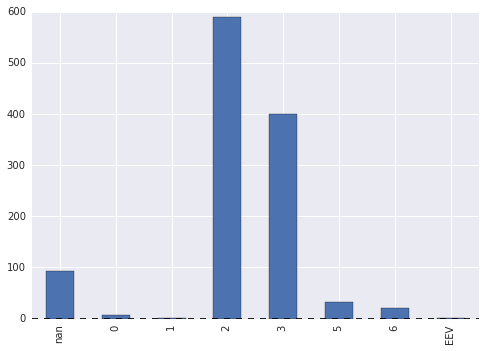

In [401]:
euro = new_car_alike['Vehicle Euro Norm Code'].value_counts(dropna=False).sort_index()
euro.plot(kind='bar')

New cars still have mostly a EURO-norm 2 (or 3), which relates to the years 1996 (2000 respectively)?

### Euronorm all registered vehicles

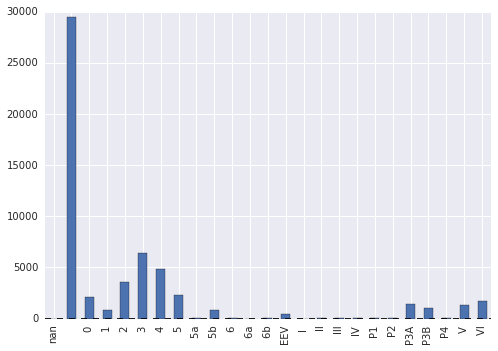

In [405]:
euro = registered['Vehicle Euro Norm Code'].value_counts(dropna=False).sort_index()
tt = euro.plot(kind='bar')

Some observations checking this dataset:

* Missing values, so 1 registration has no value
* Again, some 'missing values' by empty strings, i.e. cars without a given Norm Code
* Values for the norm is given in both arabic and roman numbers
* Values are also given in P1, P2,... Are these the same as 1, 2, 3,...?
* EEV, after google: "EEV, enhanced environmentally friendly vehicle"

Let's restructure this:

* We put everything in 1, 2, 3...
* For the ease of usage: 5a and 5b are combined as 5,...

In [406]:
registered['Vehicle Euro Norm Code'] = registered['Vehicle Euro Norm Code'].str.strip()

In [407]:
registered['Vehicle Euro Norm Code'].unique()

array([u'2', u'3', u'5', u'5b', u'V', u'', u'EEV', u'VI', u'P3A', u'P3B',
       u'6', u'5a', u'0', u'1', u'4', u'IV', u'P1', u'P2', u'6b', u'II',
       u'III', u'6a', u'P4', u'I', nan], dtype=object)

In [408]:
map_dict = {'I': '1', 'II': '2', 'III': '3', 'IV': '4', 'V': '5', 'VI': '6',
            '5a':'5', '5b': '5', 'P1':'1', 'P2':'2', 'P3A':'3', 'P3B':'3', 'P4':'4',
            '6a' : '6', '6b': '6', '' : np.nan}

In [409]:
registered['Vehicle Euro Norm Code'] = registered['Vehicle Euro Norm Code'].replace(map_dict)

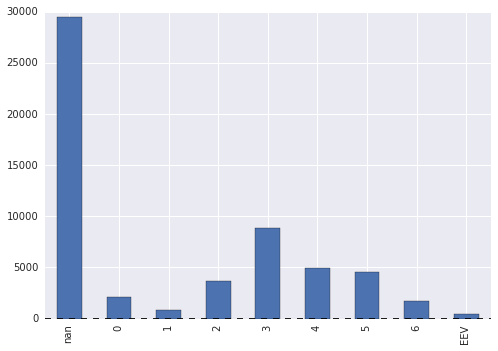

In [410]:
registered['Vehicle Euro Norm Code'].value_counts(dropna=False).sort_index().plot(kind='bar')